# Import libraries

In [1]:
# %matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List all CSV files in data folder

In [2]:
# lists the files in the folder
import os
print(os.listdir("data"))

['sample_submission.csv', 'test.csv', 'train.csv']


# Reads CSV files

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sampleSubmission = pd.read_csv('data/sample_submission.csv')

In [4]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [5]:
test.head()

,Id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,NEAR BAY
1,1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,<1H OCEAN
2,2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,INLAND
3,3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,<1H OCEAN
4,4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,INLAND


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  4128 non-null   int64  
 1   longitude           4128 non-null   float64
 2   latitude            4128 non-null   float64
 3   housing_median_age  4128 non-null   float64
 4   total_rooms         4128 non-null   float64
 5   total_bedrooms      4089 non-null   float64
 6   population          4128 non-null   float64
 7   households          4128 non-null   float64
 8   median_income       4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 322.6+ KB


In [8]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


# Finds missing data

In [9]:
train.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
test.isnull().sum()

Id                     0
longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        39
population             0
households             0
median_income          0
ocean_proximity        0
dtype: int64

# Input mean value where value is missing

In [11]:
test['total_bedrooms'] = test['total_bedrooms'].fillna(test['total_bedrooms'].mean())
train['total_bedrooms'] = train['total_bedrooms'].fillna(train['total_bedrooms'].mean())

# Finds all outliers

In [12]:
num_cols = train._get_numeric_data().columns 

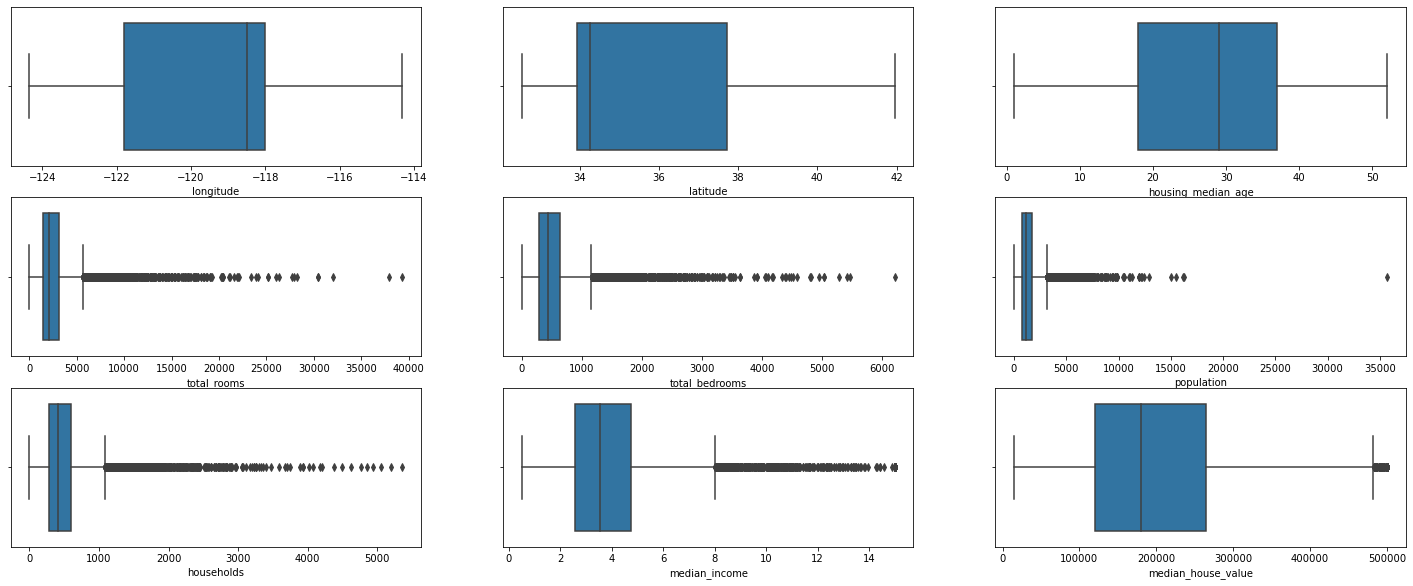

In [13]:
plt.figure(figsize = (25,45))
for i in enumerate(num_cols):
  plt.subplot(13,3,i[0]+1)
  sns.boxplot(x = train[i[1]])
  plt.xlabel(i[1])

# Remove all outliers

In [14]:
print(train['median_income'].quantile(0.5))
print(train['median_income'].quantile(0.95))
print(train['median_income'].quantile(0.75))

3.5294499999999998
7.29869
4.74645


In [15]:
train['median_income'] = np.where(train['median_income']>7.3, 4.7, train['median_income'])

In [16]:
train['median_income'].describe()

count    16512.000000
mean         3.639599
std          1.386517
min          0.499900
25%          2.562500
50%          3.529450
75%          4.700000
max          7.298800
Name: median_income, dtype: float64

<AxesSubplot:xlabel='median_income'>

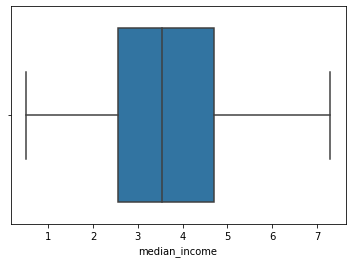

In [17]:
sns.boxplot(x='median_income', data=train)

In [18]:
print(train['population'].quantile(0.5))
print(train['population'].quantile(0.95))
print(train['population'].quantile(0.75))

1163.0
3313.1499999999924
1723.0


<AxesSubplot:xlabel='population'>

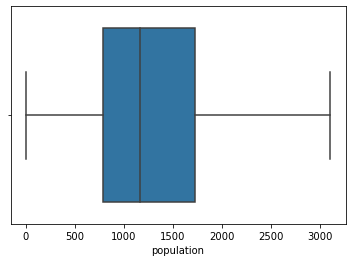

In [19]:
train['population'] = np.where(train['population']>3100, 1723, train['population'])
sns.boxplot(x='population', data=train)

In [20]:
print(train['total_bedrooms'].quantile(0.5))
print(train['total_bedrooms'].quantile(0.95))
print(train['total_bedrooms'].quantile(0.75))

437.0
1281.0
643.0


<AxesSubplot:xlabel='total_bedrooms'>

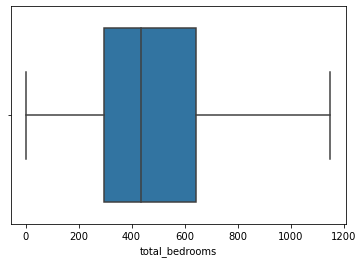

In [21]:
train['total_bedrooms'] = np.where(train['total_bedrooms']>1150, 646, train['total_bedrooms'])
sns.boxplot(x='total_bedrooms', data=train)

In [22]:
print(train['total_rooms'].quantile(0.5))
print(train['total_rooms'].quantile(0.95))
print(train['total_rooms'].quantile(0.75))

2122.5
6271.699999999993
3137.0


<AxesSubplot:xlabel='total_rooms'>

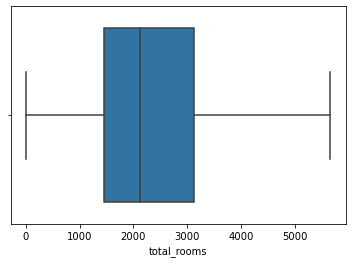

In [23]:
train['total_rooms'] = np.where(train['total_rooms']>5650, 3130, train['total_rooms'])
sns.boxplot(x='total_rooms', data=train)

In [24]:
print(train['households'].quantile(0.5))
print(train['households'].quantile(0.95))
print(train['households'].quantile(0.75))

409.0
1177.449999999999
603.0


<AxesSubplot:xlabel='households'>

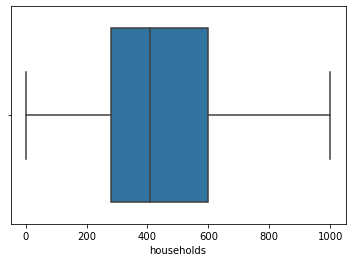

In [25]:
train['households'] = np.where(train['households']>1000, 600, train['households'])
sns.boxplot(x='households', data=train)

In [26]:
print(train['median_house_value'].quantile(0.5))
print(train['median_house_value'].quantile(0.95))
print(train['median_house_value'].quantile(0.75))

180400.0
492679.99999999953
265100.0


<AxesSubplot:xlabel='median_house_value'>

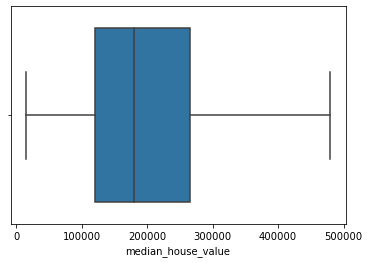

In [27]:
train['median_house_value'] = np.where(train['median_house_value']>480000, 265000, train['median_house_value'])
sns.boxplot(x='median_house_value', data=train)

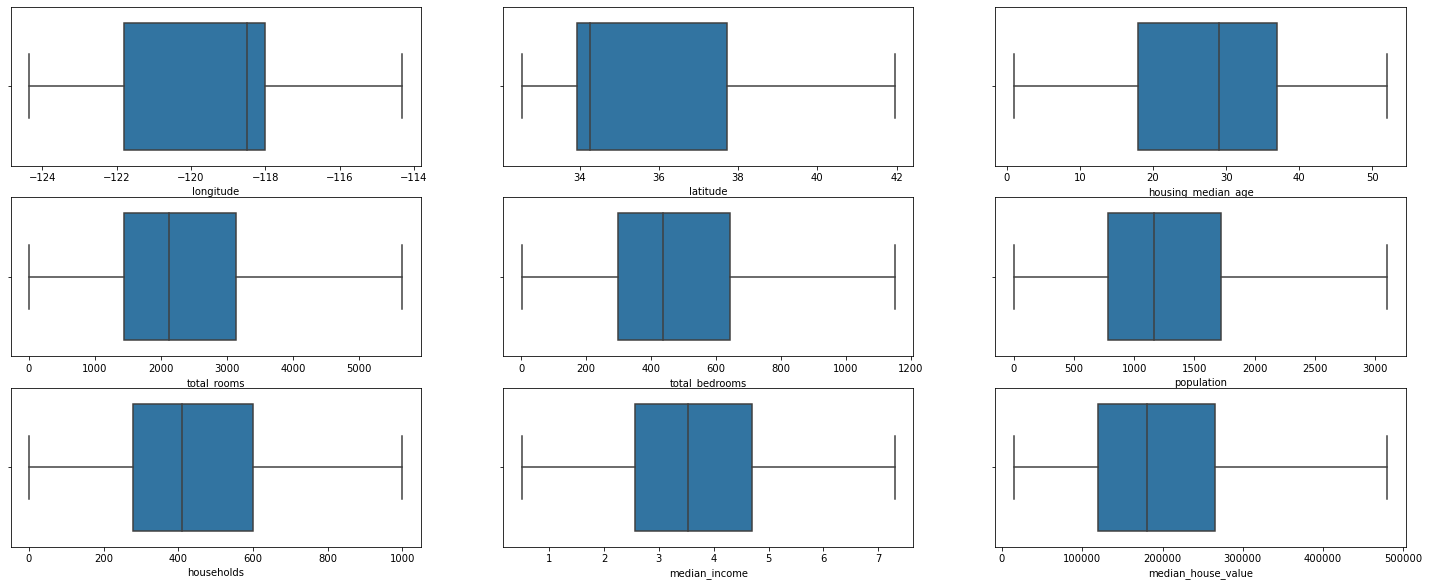

In [28]:
#Outliers
plt.figure(figsize = (25,45))
for i in enumerate(num_cols):
  plt.subplot(13,3,i[0]+1)
  sns.boxplot(x = train[i[1]])
  plt.xlabel(i[1])

# Visualizing

In [29]:
House_Price = pd.DataFrame(train['median_house_value'])

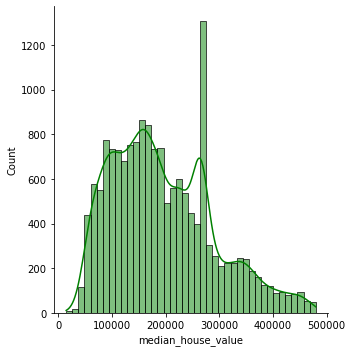

In [30]:
sns.displot(House_Price['median_house_value'], kde = True, color = 'Green')

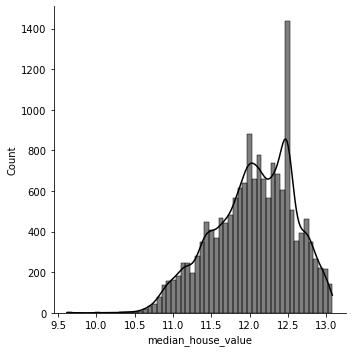

In [31]:
sns.displot(np.log(House_Price['median_house_value']), kde = True, color = 'Black')

In [32]:
data_num_cols = train._get_numeric_data().columns 
data_num_cols

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

# Finding correlation between features

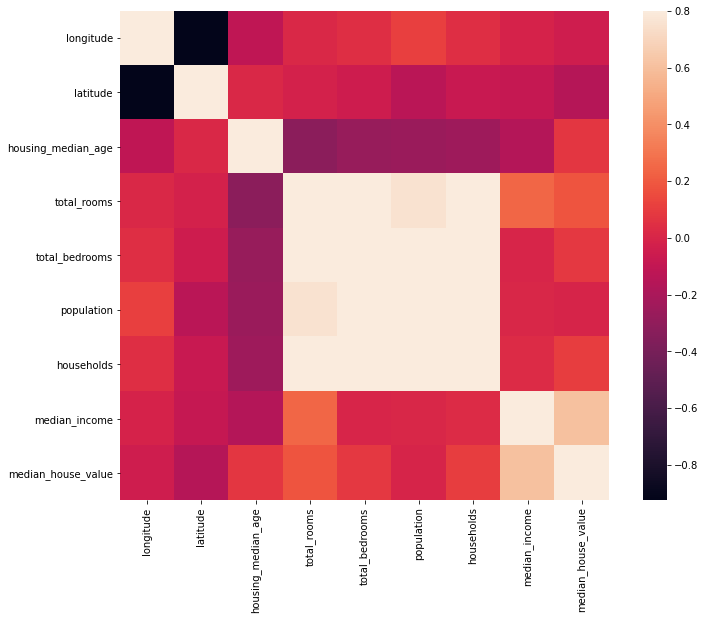

In [33]:
# Correlation Matrix Heatmap
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [34]:
most_corr = pd.DataFrame(data_num_cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,longitude
1,latitude
2,housing_median_age
3,total_rooms
4,total_bedrooms
5,population
6,households
7,median_income
8,median_house_value


# Testing

Can not convert Object to float. Tried to assign value to each of the diffrent Obect values. This only resulted in worse accuracy

In [35]:
print(train['ocean_proximity'])

0         NEAR BAY
1           INLAND
2        <1H OCEAN
3        <1H OCEAN
4         NEAR BAY
           ...    
16507    <1H OCEAN
16508       INLAND
16509    <1H OCEAN
16510       INLAND
16511       INLAND
Name: ocean_proximity, Length: 16512, dtype: object


In [36]:
mapping = {"INLAND": 1, "<1H OCEAN": 2, "NEAR BAY": 3, "NEAR OCEAN": 4, "ISLAND": 5}
for k,v in mapping.items():
    v = str(v)
    train["ocean_proximity"] = train["ocean_proximity"].str.replace(k,v)

In [37]:
train["ocean_proximity"] = train['ocean_proximity'].astype(float)

<AxesSubplot:xlabel='ocean_proximity'>

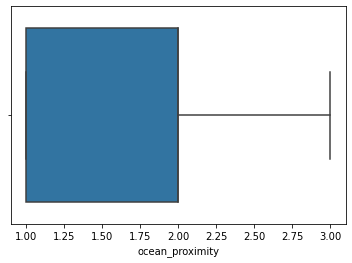

In [38]:
train['ocean_proximity'] = np.where(train['ocean_proximity']>3, 2.1, train['ocean_proximity'])
sns.boxplot(x='ocean_proximity', data=train)

# Training

Currently dropping Ocean_proximity

In [ ]:
#Working when I drop Ocean proximity
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

X = train.drop(columns = ['median_house_value'])
X = train.drop(columns = ['ocean_proximity'])
y = train['median_house_value']
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.2)
model = RandomForestClassifier() # instantiate model
model.fit(X_train, y_train) # fit on the train data
model.predict(X_val)  # predict on the validation set to measure performance 
prediction = model.predict(test) # predict on the test set
print(len(prediction))

hei
